In [40]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

tf.config.run_functions_eagerly(True)

# Needed functions

In [52]:
def show_data(img, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    plt.imshow(img.reshape((height,width)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

# Loading **DATASETS**

In [37]:
import os
import cv2
import numpy as np

stand_path = '/kaggle/input/standing-walking-dataset/Standing1/'
walk_path = '/kaggle/input/standing-walking-dataset/Walking1/'

def load_images(data_path, input_size):
    images = []
    for filename in os.listdir(data_path):
        img_path = os.path.join(data_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, input_size)
        img = img / 255.0
        images.append(img)

    images_array = np.array(images)

    return images_array

input_size = (128, 128)
batch_size = 16
stand_dataset = load_images(stand_path, input_size)
walk_dataset = load_images(walk_path, input_size)

# Building the **First** AE 

In [7]:
input_layer1 = Input(shape=(128, 128, 3), name="INPUT_s")
encoder1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer1)
encoder1 = MaxPooling2D((2, 2))(encoder1)
encoder1 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder1)
encoder1 = MaxPooling2D((2, 2))(encoder1)
encoder1 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder1)

code_layer1 = MaxPooling2D((2, 2), name="CODE_s")(encoder1)

decoder1 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same', name="DECODE_s")(code_layer1)
decoder1 = UpSampling2D((2, 2))(decoder1)
decoder1 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(decoder1)
decoder1 = UpSampling2D((2, 2))(decoder1)
decoder1 = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(decoder1)
decoder1 = UpSampling2D((2,2))(decoder1)
output_layer1 = Conv2D(3, (3, 3), padding='same', name="OUTPUT_s")(decoder1)

In [8]:
stand_AE = Model(input_layer1, output_layer1)
stand_AE.compile(optimizer='adam', loss='mse')
stand_AE.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT_s (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 8)         584 

# Building the **Second** AE

In [9]:
input_layer2 = Input(shape=(128, 128, 3), name="INPUT_w")
encoder2 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer2)
encoder2 = MaxPooling2D((2, 2))(encoder2)
encoder2 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder2)
encoder2 = MaxPooling2D((2, 2))(encoder2)
encoder2 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder2)

code_layer2 = MaxPooling2D((2, 2), name="CODE_w")(encoder2)

decoder2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same', name="DECODE_w")(code_layer2)
decoder2 = UpSampling2D((2, 2))(decoder2)
decoder2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(decoder2)
decoder2 = UpSampling2D((2, 2))(decoder2)
decoder2 = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(decoder2)
decoder2 = UpSampling2D((2,2))(decoder2)
output_layer2 = Conv2D(3, (3, 3), padding='same', name="OUTPUT_w")(decoder2)

In [10]:
walk_AE = Model(input_layer2, output_layer2)
walk_AE.compile(optimizer='adam', loss='mse')
walk_AE.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT_w (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 8)         584 

## Training both AE

In [41]:
stand_AE.fit(stand_dataset, stand_dataset,
                epochs=30,
                batch_size=16,
                shuffle=True)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 1s 426ms/step - loss: 0.3123
Epoch 2/30
3/3 [==============================] - 1s 441ms/step - loss: 0.2967
Epoch 3/30
3/3 [==============================] - 1s 414ms/step - loss: 0.2795
Epoch 4/30
3/3 [==============================] - 1s 407ms/step - loss: 0.2461
Epoch 5/30
3/3 [==============================] - 1s 392ms/step - loss: 0.1854
Epoch 6/30
3/3 [==============================] - 1s 422ms/step - loss: 0.0978
Epoch 7/30
3/3 [==============================] - 1s 410ms/step - loss: 0.0836
Epoch 8/30
3/3 [==============================] - 1s 388ms/step - loss: 0.0821
Epoch 9/30
3/3 [==============================] - 1s 402ms/step - loss: 0.0522
Epoch 10/30
3/3 [==============================] - 1s 399ms/step - loss: 0.0567
Epoch 11/30
3/3 [==============================] - 1s 393ms/step - loss: 0.0546
Epoch 12/30
3/3 [==============================] - 1s 431ms/step - loss: 0.0450
Epoch 13/30
3/3 [==============================] - 1s 413ms/

In [42]:
walk_AE.fit(walk_dataset, walk_dataset,
                epochs=30,
                batch_size=16,
                shuffle=True)

Epoch 1/30
6/6 [==============================] - 3s 480ms/step - loss: 0.2903
Epoch 2/30
6/6 [==============================] - 3s 461ms/step - loss: 0.1121
Epoch 3/30
6/6 [==============================] - 3s 476ms/step - loss: 0.0692
Epoch 4/30
6/6 [==============================] - 3s 471ms/step - loss: 0.0627
Epoch 5/30
6/6 [==============================] - 3s 462ms/step - loss: 0.0504
Epoch 6/30
6/6 [==============================] - 3s 488ms/step - loss: 0.0444
Epoch 7/30
6/6 [==============================] - 3s 486ms/step - loss: 0.0387
Epoch 8/30
6/6 [==============================] - 3s 474ms/step - loss: 0.0333
Epoch 9/30
6/6 [==============================] - 3s 491ms/step - loss: 0.0284
Epoch 10/30
6/6 [==============================] - 3s 503ms/step - loss: 0.0248
Epoch 11/30
6/6 [==============================] - 3s 482ms/step - loss: 0.0219
Epoch 12/30
6/6 [==============================] - 3s 515ms/step - loss: 0.0198
Epoch 13/30
6/6 [==============================] 

# Save the models

In [43]:
stand_AE.save("stand.h5")
walk_AE.save("walk.h5")

# Spliting the First AE

## Encoder

In [44]:
stand_encoder = Model(inputs=stand_AE.input, outputs=stand_AE.get_layer("CODE_s").output)
stand_encoder.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT_s (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 8)         584

## Decoder

In [45]:
stand_decoder = Model(inputs=stand_AE.get_layer("CODE_s").output, outputs=stand_AE.output)
stand_decoder.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 16, 16, 8)]       0         
                                                                 
 DECODE_s (Conv2DTranspose)  (None, 16, 16, 8)         584       
                                                                 
 up_sampling2d_9 (UpSampling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 32, 32, 8)        584       
 ranspose)                                                       
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                          

# Spliting the Second AE

## Encoder

In [48]:
walk_encoder = Model(inputs=walk_AE.input, outputs=walk_AE.get_layer("CODE_w").output)
walk_encoder.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT_w (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 8)         584

## Decoder

In [49]:
walk_decoder = Model(inputs=walk_AE.get_layer("CODE_w").output, outputs=walk_AE.output)
walk_decoder.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 16, 16, 8)]       0         
                                                                 
 DECODE_w (Conv2DTranspose)  (None, 16, 16, 8)         584       
                                                                 
 up_sampling2d_12 (UpSamplin  (None, 32, 32, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 32, 32, 8)        584       
 ranspose)                                                       
                                                                 
 up_sampling2d_13 (UpSamplin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                          

# Combining the Models

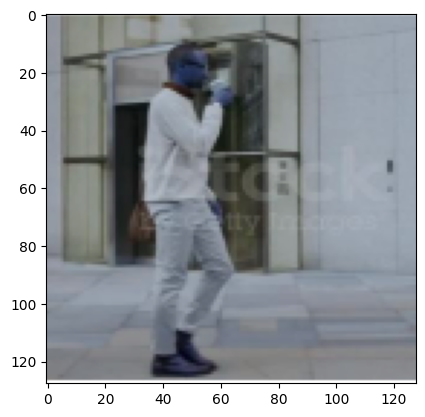

In [64]:
# test image
test_img = cv2.imread('/kaggle/input/test-walking-data/frame1.png')
test_img = cv2.resize(test_img,(128,128))
test_img = np.array(test_img)
plt.imshow(test_img)

### From *standing* to *walking*

In [65]:
encoded_stand = stand_encoder.predict(test_img)
plt.imshow(encoded_stand)

ValueError: Input 0 of layer "model_17" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(32, 128, 3)

In [ ]:
decoded_walk = walk_decoder.predict(encoded_stand)

### From *walking* to *standing*

In [ ]:
encoded_walk = walk_encoder.predict(input_image)
decoded_stand = stand_decoder.predict(encoded_walk)